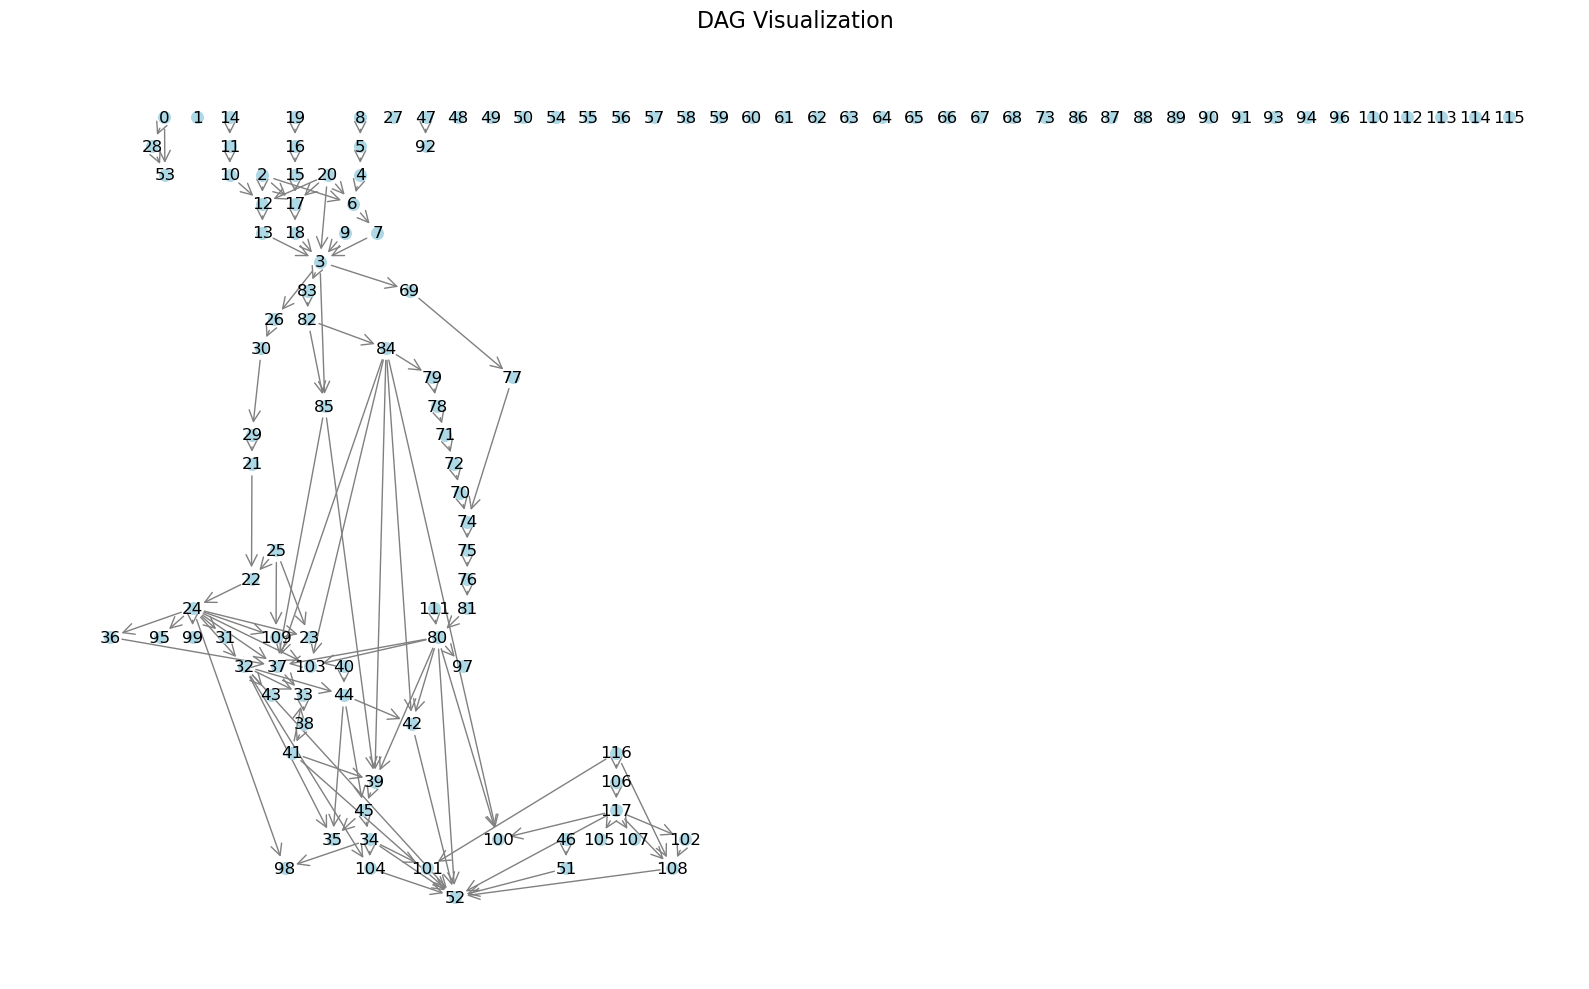

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from yaml_dag_reader import YamlDagReader  # あなたのクラスファイルをyaml_dag_reader.pyと仮定

file_path = "/home/yutaro/wd/multi-rate_simulator/src/autoware_dag.yaml"



def visualize_dag(file_path):
    reader = YamlDagReader(file_path)
    wcets, edges, deadline, k_parallel, index, periods, seeds = reader.read()

    # DAGの生成
    G = nx.DiGraph()
    for node_id in index:
        G.add_node(node_id, wcet=wcets[node_id], k=k_parallel[node_id], period=periods[node_id])

    for src, tgt in edges:
        G.add_edge(src, tgt)

    # 可視化の設定
    pos = nx.nx_pydot.graphviz_layout(G, prog='dot')  # 上から下のレイアウト
    plt.figure(figsize=(16, 10))

    # ノードの描画
    nx.draw_networkx_nodes(G, pos, node_size=70, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, labels={i: f'{i}' for i in index}, font_size=12)

    # エッジの描画
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')

    plt.title("DAG Visualization", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用例
visualize_dag(file_path)
